In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
# Third party python libraries
import numpy

# Try and import from "The Virtual Brain"
from tvb.simulator.lab import *
LOG = get_logger('demo')
from tvb.datatypes.time_series import TimeSeriesRegion
import tvb.analyzers.fmri_balloon as bold
from tvb.simulator.plot import timeseries_interactive as timeseries_interactive

In [5]:
LOG.info("Configuring...")

In [9]:
#Initialise a Model, Coupling, and Connectivity.
lb = models.LarterBreakspear(QV_max=1.0, QZ_max=1.0, 
                             d_V=0.65, d_Z=0.65, 
                             aee=0.36, ani=0.4, ane=1.0, C=0.1)

lb.variables_of_interest = ["V", "W", "Z"]

white_matter = connectivity.Connectivity()#load_default=True)
white_matter.speed = numpy.array([7.0])

white_matter_coupling = coupling.HyperbolicTangent(a=0.5*lb.QV_max, 
                                                   midpoint=lb.VT, 
                                                   sigma=lb.d_V)

TraitTypeError: Attribute can't be set to an instance of <class 'float'>
  attribute tvb.simulator.models.larter_breakspear.LarterBreakspear.QV_max = NArray(label=':math:`QV_{max}`', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)

In [3]:
%matplotlib inline
#widget
import matplotlib.pyplot as plt
import numpy
from tvb.simulator.lab import *

In [5]:
rww = models.ReducedWongWang(a=numpy.array([0.27]), w=numpy.array([1.0]), I_o=numpy.array([0.3]))

In [12]:
sim = simulator.Simulator(
    model=rww,
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.5 / 50.0])),
    integrator=integrators.EulerStochastic(dt=1, noise=noise.Additive(nsig=numpy.array([1e-5]))), 
    monitors=(
        monitors.TemporalAverage(period=1.),
        monitors.Bold(period=500.0), #TODO: BalloonWindkesselMonitor
        monitors.ProgressLogger(period=1e3)
    ),
    simulation_length=2e4
).configure()

WARNING  File 'hemispheres' not found in ZIP.


In [13]:


(tavg_time, tavg_data), (bold_time, bold_data), _ = sim.run()



   INFO  step 1 time 0.0010 s
   INFO  step 1001 time 1.0010 s
   INFO  step 2001 time 2.0010 s
   INFO  step 3001 time 3.0010 s
   INFO  step 4001 time 4.0010 s
   INFO  step 5001 time 5.0010 s
   INFO  step 6001 time 6.0010 s
   INFO  step 7001 time 7.0010 s
   INFO  step 8001 time 8.0010 s
   INFO  step 9001 time 9.0010 s
   INFO  step 10001 time 10.0010 s
   INFO  step 11001 time 11.0010 s
   INFO  step 12001 time 12.0010 s
   INFO  step 13001 time 13.0010 s
   INFO  step 14001 time 14.0010 s
   INFO  step 15001 time 15.0010 s
   INFO  step 16001 time 16.0010 s
   INFO  step 17001 time 17.0010 s
   INFO  step 18001 time 18.0010 s
   INFO  step 19001 time 19.0010 s


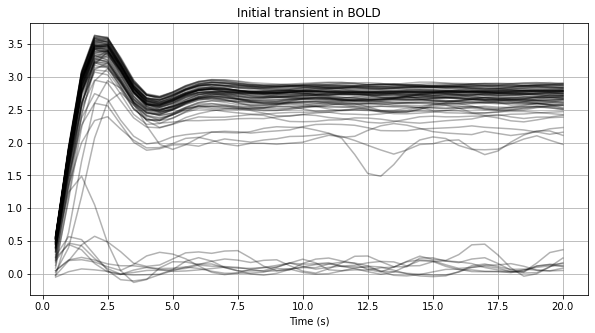

In [14]:


plt.figure(figsize=(10, 5))
plt.plot(bold_time * 1e-3, bold_data[:, 0, :, 0], 'k', alpha=0.3)
plt.title('Initial transient in BOLD')
plt.xlabel('Time (s)')
plt.grid(True);



In [16]:
# Third party python libraries
import numpy

# Try and import from "The Virtual Brain"
from tvb.simulator.lab import *
LOG = get_logger('demo')
from tvb.datatypes.time_series import TimeSeriesRegion
import tvb.analyzers.fmri_balloon as bold
from tvb.simulator.plot import timeseries_interactive as timeseries_interactive

In [ ]:
conn = connectivity.Connectivity.from_file()

# configure stimulus spatial pattern
weighting = numpy.zeros((76, ))
weighting[[0, 7, 13, 33, 42]] = numpy.array([2.0 ** -2, 2.0 ** -3, 2.0 ** -4, 2.0 ** -5, 2.0 ** -6])

# temporal profile
eqn_t = equations.Gaussian()
eqn_t.parameters["midpoint"] = 25000.0
eqn_t.parameters["sigma"] = 2000.0

stimulus = patterns.StimuliRegion(temporal=eqn_t,
                                  connectivity=conn,
                                  weight=weighting)

In [20]:
conn = connectivity.Connectivity.from_file()


sim = simulator.Simulator(
    model=models.Generic2dOscillator(a=numpy.array([0.5])),
    connectivity=conn,
    coupling=coupling.Linear(a=numpy.array([0.0126])),
    integrator=integrators.HeunDeterministic(dt=0.5),
    monitors=(
        monitors.TemporalAverage(period=1.0),
        monitors.Bold(period=500),
        monitors.ProgressLogger(period=5e3),
        ),
    #stimulus=stimulus,
    simulation_length=60e3, # 1 minute simulation
).configure()

(tavg_time, tavg_data), (bold_time, bold_data), _ = sim.run()

WARNING  File 'hemispheres' not found in ZIP.
WARNING  random_state supplied for non-stochastic integration
   INFO  step 1 time 0.0005 s
   INFO  step 10001 time 5.0005 s
   INFO  step 20001 time 10.0005 s
   INFO  step 30001 time 15.0005 s
   INFO  step 40001 time 20.0005 s
   INFO  step 50001 time 25.0005 s
   INFO  step 60001 time 30.0005 s
   INFO  step 70001 time 35.0005 s
   INFO  step 80001 time 40.0005 s
   INFO  step 90001 time 45.0005 s
   INFO  step 100001 time 50.0005 s
   INFO  step 110001 time 55.0005 s


In [22]:
TAVG_TIME = numpy.array(tavg_time)
#BOLD_TIME = numpy.array(bold_time) # ???
#BOLD = numpy.array(bold_data) # ???
TAVG = numpy.array(tavg_data)

#Create TimeSeries instance
tsr = TimeSeriesRegion(connectivity = conn,
                       data = TAVG,
                       time = TAVG_TIME,
                       sample_period = 2.,)
tsr.configure()



In [ ]:
#Create and run the monitor/analyser
bold_model = bold.BalloonModel(time_series = tsr)

In [23]:
bold_data  = bold_model.evaluate()

/Users/pfc/Documents/GitHub/tvb-root/tvb_library/tvb/analyzers/fmri_balloon.py:314: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return numpy.array([k1, k2, k3])


In [25]:
bold_tsr = TimeSeriesRegion(connectivity = conn,
                            data = bold_data.data, 
                            time = bold_data.time)

In [29]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
tsi = timeseries_interactive.TimeSeriesInteractive(time_series = bold_tsr)

In [31]:
tsi.configure()

GridBox(children=(Output(layout=Layout(border='solid 1px black', margin='3px 3px 3px 3px', padding='2px 2px 2p…

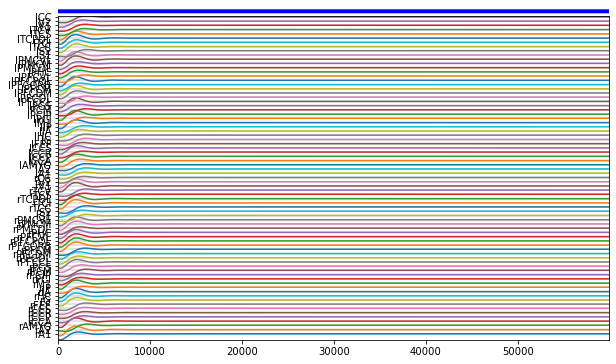

In [32]:
tsi.show()

In [37]:
bold_data.data.shape

(60000, 1, 76, 1)

Text(0.5, 0, 'Time (ms)')

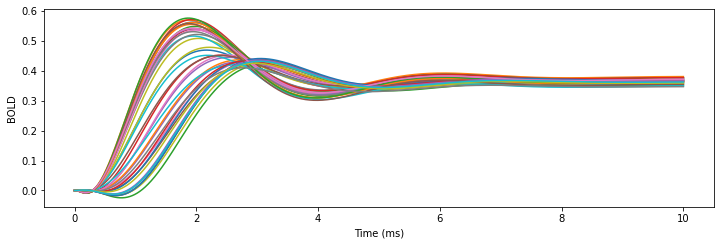

In [48]:
plt.figure(figsize=(12,8))

plt.subplot(212)
plt.plot(bold_data.time[:10000], bold_data.data[:10000, 0, :40, 0])
plt.ylabel("BOLD")

plt.xlabel('Time (ms)')

Text(0.5, 0, 'Time (ms)')

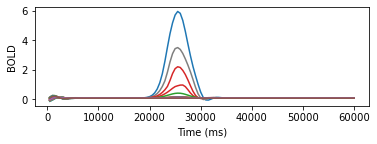

In [19]:
plt.figure()

plt.subplot(212)
plt.plot(bold_time, bold_data[:, 0, :, 0])
plt.ylabel("BOLD")

plt.xlabel('Time (ms)')


In [17]:

LOG.info("Configuring...")

In [15]:
#Create and run the monitor/analyser
bold_model = bold.BalloonModel(time_series = tsr)

NameError: name 'BalloonModel' is not defined

### Stephan 2007:

$$
\frac{ds}{dt} = x - \kappa\,s - \gamma \,(f-1) \\
\frac{df}{dt} = s \\
\frac{dv}{dt} = \frac{1}{\tau_o} \, (f - v^{1/\alpha})\\
\frac{dq}{dt} = \frac{1}{\tau_o}(f \, \frac{1-(1-E_0)^{1/\alpha}}{E_0} - v^{1/\alpha} \frac{q}{v})\\
\kappa = \frac{1}{\tau_s}\\
\gamma = \frac{1}{\tau_f}
$$

In [51]:
bold.BalloonModel.balloon_dfun = balloon_dfun

In [49]:
def balloon_dfun(self, state_variables, neural_input, local_coupling=0.0):
    r"""
    The Balloon model equations. See Eqs. (4-10) in [Stephan2007]_
    .. math::
            \frac{ds}{dt} &= x - \kappa\,s - \gamma \,(f-1) \\
            \frac{df}{dt} &= s \\
            \frac{dv}{dt} &= \frac{1}{\tau_o} \, (f - v^{1/\alpha})\\
            \frac{dq}{dt} &= \frac{1}{\tau_o}(f \, \frac{1-(1-E_0)^{1/\alpha}}{E_0} - v^{&/\alpha} \frac{q}{v})\\
            \kappa &= \frac{1}{\tau_s}\\
            \gamma &= \frac{1}{\tau_f}
    """

    s = state_variables[0, :]
    f = state_variables[1, :]
    v = state_variables[2, :]
    q = state_variables[3, :]

    x = neural_input[0, :]

    ds = x - (1. / self.tau_s) * s - (1. / self.tau_f) * (f - 1)
    df = s
    dv = (1. / self.tau_o) * (f - v ** (1. / self.alpha))
    dq = (1. / self.tau_o) * ((f * (1. - (1. - self.E0) ** (1. / f)) / self.E0) -
                              (v ** (1. / self.alpha)) * (q / v))

    return numpy.array([ds, df, dv, dq])

In [52]:
#Create and run the monitor/analyser
bold_model = bold.BalloonModel(time_series = tsr)

In [53]:
bold_data  = bold_model.evaluate()
bold_tsr = TimeSeriesRegion(connectivity = conn,
                            data = bold_data.data, 
                            time = bold_data.time)

/Users/pfc/Documents/GitHub/tvb-root/tvb_library/tvb/analyzers/fmri_balloon.py:314: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return numpy.array([k1, k2, k3])


Text(0.5, 0, 'Time (ms)')

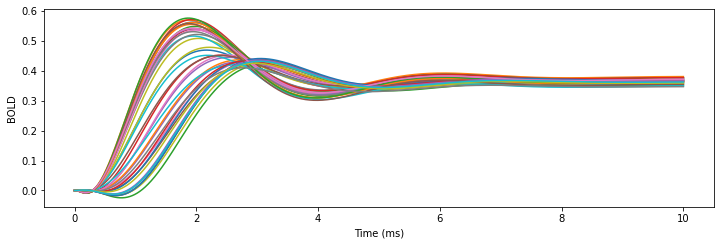

In [54]:
plt.figure(figsize=(12,8))

plt.subplot(212)
plt.plot(bold_data.time[:10000], bold_data.data[:10000, 0, :40, 0])
plt.ylabel("BOLD")

plt.xlabel('Time (ms)')